### Time Series Forecasting - ML Supervised Model

#### Importing necessary libraries and reading the data

In [7]:
import pandas as pd

In [8]:
df=pd.read_csv('/Users/selva/Documents/ML Project/input_price_data_5.csv',sep=';',names=['date','price_euro'],skiprows=[0])
df['date'] = pd.to_datetime(df['date'])
df['price_euro'] = df['price_euro'].str.replace(',', '.')
df['price_euro'] = df['price_euro'].astype(float)
df.set_index('date', inplace=True)
df.head(10)


,price_euro
date,
2018-09-01,33.19
2018-10-01,33.83
2018-11-01,35.43
2018-12-01,36.63
2019-01-01,37.16
2019-02-01,36.47
2019-03-01,35.47
2019-04-01,35.22
2019-05-01,34.98


#### To use a linear regression model, the three lagged values of the dependent variable are taken into account.

In [12]:
df['price_lastmonth']=df['price_euro'].shift(+1)
df['price_2monthsback']=df['price_euro'].shift(+2)
df['price_3monthsback']=df['price_euro'].shift(+3)
df.head(5)

,price_euro,price_lastmonth,price_2monthsback,price_3monthsback
date,,,,
2018-12-01,36.63,NaN,NaN,NaN
2019-01-01,37.16,36.63,NaN,NaN
2019-02-01,36.47,37.16,36.63,NaN
2019-03-01,35.47,36.47,37.16,36.63
2019-04-01,35.22,35.47,36.47,37.16


#### To proceed further, the NA values should be removed.

In [13]:
df=df.dropna()
df.head(5)

,price_euro,price_lastmonth,price_2monthsback,price_3monthsback
date,,,,
2019-03-01,35.47,36.47,37.16,36.63
2019-04-01,35.22,35.47,36.47,37.16
2019-05-01,34.98,35.22,35.47,36.47
2019-06-01,34.49,34.98,35.22,35.47
2019-07-01,33.97,34.49,34.98,35.22


### Importing Linear and RandomForest Model

In [14]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [44]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=50,max_features=3, random_state=1)

### Changing the format of data inorder to fit the model

In [45]:
import numpy as np
x1,x2,x3,y=df['price_lastmonth'],df['price_2monthsback'],df['price_3monthsback'],df['price_euro']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[36.47 37.16 36.63]
 [35.47 36.47 37.16]
 [35.22 35.47 36.47]
 [34.98 35.22 35.47]
 [34.49 34.98 35.22]
 [33.97 34.49 34.98]
 [33.46 33.97 34.49]
 [32.93 33.46 33.97]
 [33.01 32.93 33.46]
 [33.88 33.01 32.93]
 [34.65 33.88 33.01]
 [35.19 34.65 33.88]
 [35.29 35.19 34.65]
 [34.94 35.29 35.19]
 [34.81 34.94 35.29]
 [34.91 34.81 34.94]
 [34.05 34.91 34.81]
 [32.52 34.05 34.91]
 [31.96 32.52 34.05]
 [31.82 31.96 32.52]
 [32.02 31.82 31.96]
 [33.24 32.02 31.82]
 [34.84 33.24 32.02]
 [35.05 34.84 33.24]
 [35.13 35.05 34.84]
 [34.68 35.13 35.05]
 [34.67 34.68 35.13]
 [34.95 34.67 34.68]
 [35.6  34.95 34.67]
 [35.95 35.6  34.95]
 [35.86 35.95 35.6 ]
 [35.99 35.86 35.95]
 [36.53 35.99 35.86]
 [37.96 36.53 35.99]
 [39.24 37.96 36.53]
 [40.46 39.24 37.96]
 [42.31 40.46 39.24]
 [43.02 42.31 40.46]
 [44.25 43.02 42.31]
 [46.01 44.25 43.02]
 [48.48 46.01 44.25]
 [50.1  48.48 46.01]
 [51.73 50.1  48.48]
 [54.4  51.73 50.1 ]
 [56.19 54.4  51.73]
 [58.56 56.19 54.4 ]
 [60.53 58.56 56.19]
 [61.58 60.53

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=final_x[:-12],final_x[-12:],y[:-12],y[-12:]

In [79]:
model.fit(X_train,y_train)
lin_model.fit(X_train,y_train)

/var/folders/ql/5c8r7ybd50sfxsy3p12bhm180000gn/T/ipykernel_1616/1977262272.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


LinearRegression()

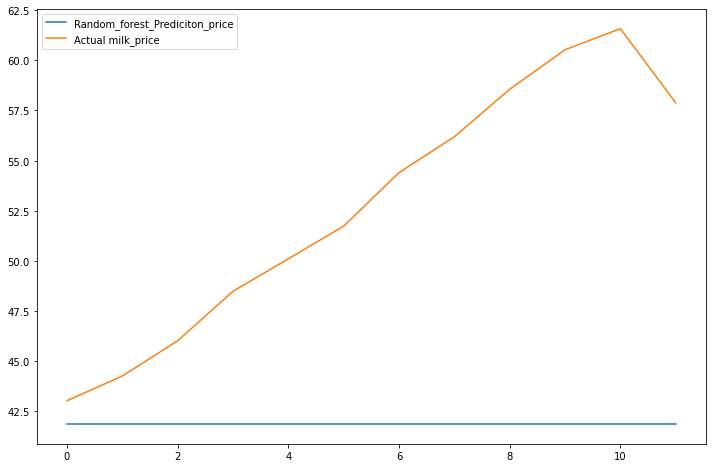

In [80]:
pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(12,8)
plt.plot(pred,label='Random_forest_Prediciton_price')
plt.plot(y_test,label='Actual milk_price')
plt.legend(loc='upper left')
plt.show()

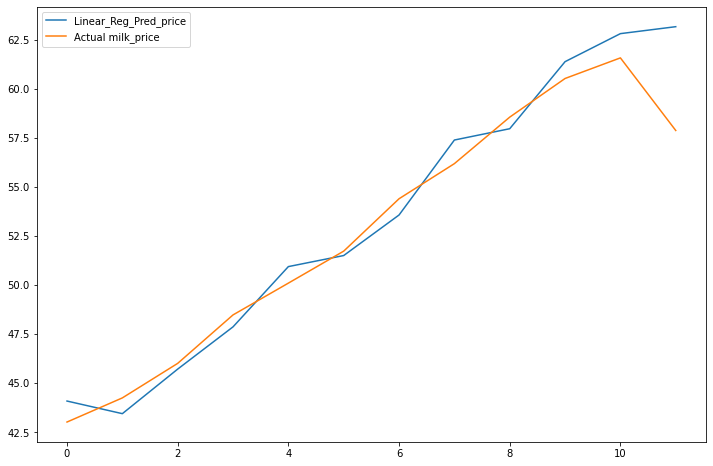

In [81]:
lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(12,8)
plt.plot(lin_pred,label='Linear_Reg_Pred_price')
plt.plot(y_test,label='Actual milk_price')
plt.legend(loc='upper left')
plt.show()

### Evaluating the model by calculating RMSE 

In [82]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_rf=sqrt(mean_squared_error(pred,y_test))
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))

In [77]:
print('MSE for Random: ' ,rmse_rf)
print('MSE for Linear: ' ,rmse_lr)

MSE for Random:  12.99106150304892
MSE for Linear:  2.8843981221468193


#### From the prediction graph and rmse value, it is clear that Linear Regression model performs well. Random Forest Model is not suited for this data.